In [2]:
!pip install gensim scikit-learn matplotlib


Defaulting to user installation because normal site-packages is not writeable


In [3]:
import gensim.downloader as api
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [4]:
# Word2Vec
w2v_model = api.load("word2vec-google-news-300")

# GloVe
glove_model = api.load("glove-wiki-gigaword-100")

# FastText
fasttext_model = api.load("fasttext-wiki-news-subwords-300")


[==================================================] 100.0% 1662.8/1662.8MB downloaded
[==================================================] 100.0% 128.1/128.1MB downloaded
[==================================================] 100.0% 958.5/958.4MB downloaded


In [5]:
def word_similarity(model, w1, w2):
    try:
        sim = model.similarity(w1, w2)
        print(f"Similarity between '{w1}' and '{w2}' = {sim:.3f}")
    except:
        print("Word not found in vocabulary")


In [6]:
word_similarity(glove_model, "car", "vehicle")


Similarity between 'car' and 'vehicle' = 0.863


In [7]:
def analogy(model, a, b, c):
    try:
        result = model.most_similar(positive=[a, c], negative=[b], topn=1)
        print(f"{a} - {b} + {c} ≈ {result[0][0]}")
    except:
        print("Analogy failed")


In [8]:
analogy(glove_model, "king", "man", "woman")


king - man + woman ≈ queen


In [9]:
word = "unhappiness"

print("Word2Vec:")
print(word in w2v_model)

print("GloVe:")
print(word in glove_model)

print("FastText:")
print(word in fasttext_model)  


Word2Vec:
True
GloVe:
True
FastText:
True


In [12]:
def visualize_words(model, words, method="pca"):
    vectors = []
    valid_words = []

    for w in words:
        if w in model:
            vectors.append(model[w])
            valid_words.append(w)

    vectors = np.array(vectors)

    if method == "pca":
        reducer = PCA(n_components=2)
    else:
        reducer = TSNE(n_components=2, random_state=42, perplexity=5)

    reduced = reducer.fit_transform(vectors)

    plt.figure(figsize=(8,6))
    for i, word in enumerate(valid_words):
        x, y = reduced[i]
        plt.scatter(x, y)
        plt.text(x+0.01, y+0.01, word)

    plt.title(method.upper() + " Word Embedding Visualization")
    plt.show()


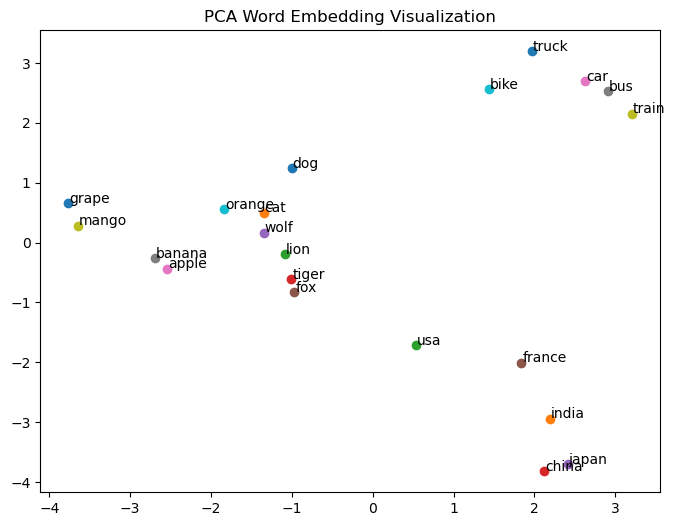

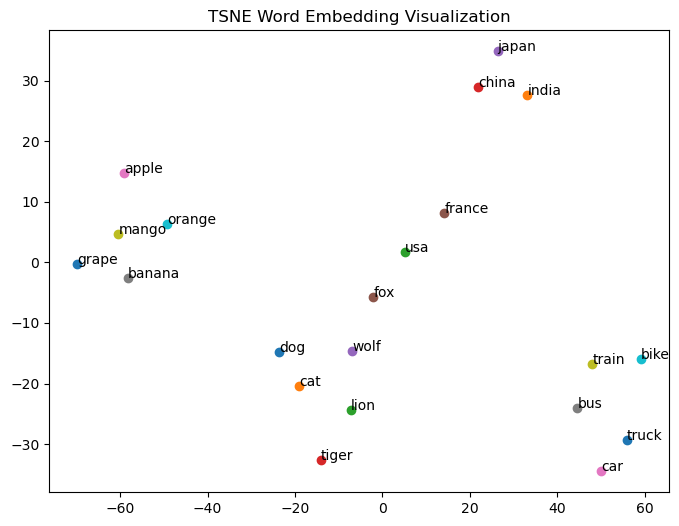

In [13]:
words = ["dog","cat","lion","tiger","wolf","fox",
         "apple","banana","mango","orange","grape",
         "india","usa","china","japan","france",
         "car","bus","train","bike","truck"]


visualize_words(glove_model, words, method="pca")
visualize_words(glove_model, words, method="tsne")


In [14]:
models = {
    "Word2Vec": w2v_model,
    "GloVe": glove_model,
    "FastText": fasttext_model
}

for name, model in models.items():
    try:
        sim = model.similarity("king", "queen")
        print(name, "Similarity king-queen:", sim)
    except:
        print(name, "Error")


Word2Vec Similarity king-queen: 0.6510957
GloVe Similarity king-queen: 0.7507691
FastText Similarity king-queen: 0.7704246
